In [1]:
import cv2
import torch
from PIL import Image
import glob
import os

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
MODEL = 'yolov5x6'
model = torch.hub.load('ultralytics/yolov5', MODEL)

# Images
# for f in 'zidane.jpg', 'bus.jpg':
#     torch.hub.download_url_to_file('https://ultralytics.com/images/' + f, f)  # download 2 images
# im1 = Image.open('zidane.jpg')  # PIL image
# im2 = cv2.imread('bus.jpg')[..., ::-1]  # OpenCV image (BGR to RGB)
images = [cv2.imread(file) for file in glob.glob("./images/*.jpg")]
# Inference
results = model(images, size=128) # batch of images

Using cache found in C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-12-5 Python-3.9.13 torch-1.13.0+cu117 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)



'charmap' codec can't decode byte 0x9f in position 10: character maps to <undefined>


Fusing layers... 
YOLOv5x6 summary: 574 layers, 140730220 parameters, 0 gradients
Adding AutoShape... 


In [102]:
names = [os.path.basename(x) for x in glob.glob("./images/*.jpg")]
names[1]

'10.jpg'

In [103]:
# results.print()  
# results.show()  # or .show()

results.xyxy[0]  # im1 predictions (tensor)
results.pandas().xyxy[58]  # im1 predictions (pandas)

,xmin,ymin,xmax,ymax,confidence,class,name


In [104]:
df_list = results.pandas().xyxy

In [105]:
!mkdir counting_yolo
os.remove(f"./counting_yolo/{MODEL}.txt")
for i in range(len(df_list)):
    vehicle_list = ['bicycle','car','motorcycle','airplane','bus','train','truck','boat']
    df_list[i]['name'] = df_list[i]['name'].apply(lambda x: 'vehicle' if x in vehicle_list else x )
    temp = df_list[i]['name'][df_list[i]['name']=='vehicle'].value_counts()
    if not temp.empty:
        n = temp['vehicle']
    else:
        n = 0
    file_name = names[i][:-4] # cut extension
    f = open(f"./counting_yolo/{MODEL}.txt","a+")
    f.write(f"{file_name} {n}\n")
    f.close()
    # break

A subdirectory or file counting_yolo already exists.


In [110]:
results.save(save_dir='./yolo_result',exist_ok=True)

for i in range(len(names)):
    file_name = names[i]
    os.rename(f'./yolo_result/image{i}.jpg', f'./yolo_result/{file_name}') 

Saved 300 images to yolo_result


In [95]:
results = model(images[0],size=128) # batch of images

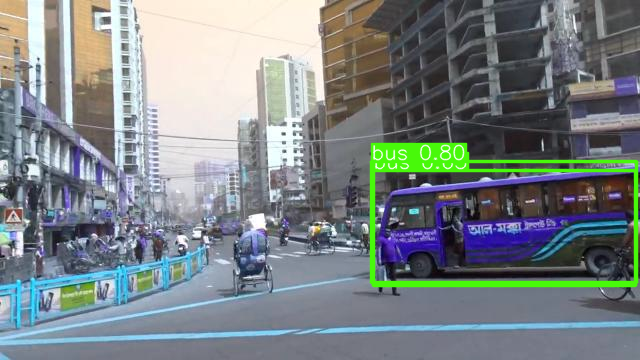

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 360x640 1 bus
Speed: 2.0ms pre-process, 248.6ms inference, 4.0ms NMS per image at shape (1, 3, 128, 128)

In [96]:
# results.print()  
results.show()  # or .show()

# results.xyxy[0]  # im1 predictions (tensor)
results.pandas()  # im1 predictions (pandas)
#      xmin    ymin    xmax   ymax  confidence  class    name
# 0  749.50   43.50  1148.0  704.5    0.874023      0  person
# 1  433.50  433.50   517.5  714.5    0.687988     27     tie
# 2  114.75  195.75  1095.0  708.0    0.624512      0  person
# 3  986.00  304.00  1028.0  420.0    0.286865     27     tie